### Mounting drive and downloading files

In [1]:
install.packages('googledrive')
library(googledrive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check)
  options(rlang_interactive=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.2 (2022-11-11 22:00:03 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, warnings




In [3]:
drive_auth(use_oob = TRUE, cache = TRUE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AfgeXvuG79ykPYzSkF7zROOhxEDpDTBr4G73JTJDIoM9a4m_hQox0ayp_uA


### Libraries

In [4]:
install.packages('data.table')
install.packages('ggplot2')
install.packages('dplyr')
install.packages('tidyr')
install.packages('stringr')
#install.packages("ggraph")
#install.packages('gridExtra')
library(data.table)
library(ggplot2)
library(dplyr)
library(tidyr)
library(stringr)
#library(ggraph)
#library(gridExtra)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:R.utils’:

    extract




In [22]:
install.packages("ggraph")
library(ggraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘Rcpp’, ‘ggforce’, ‘igraph’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’




# **TO DO**
- a lot

# Every table cleaned and filtered (IGNORE THIS PART)

## Title Basics

In [ ]:
downloaded_file <- drive_download("title.basics.tsv")

File downloaded:

• title.basics.tsv <id: 1od_T5wrktmj_OousSXD1I3z_ZTRl_-gP>

Saved locally as:

• title.basics.tsv



In [ ]:
tb <- fread("title.basics.tsv")

Warning message in fread("title.basics.tsv"):
“Found and resolved improper quoting out-of-sample. First healed line 32524: <<tt0033122	movie	"Swing it" magistern	"Swing it" magistern	0	1940	\N	92	Comedy,Music>>. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="" to avoid this warning.”


In [ ]:
tb <- tb %>% mutate(across(where(is.character), ~na_if(.,"\\N")))

In [ ]:
tb$titleType = as.factor(tb$titleType)
tb <- tb %>% mutate(genres = strsplit(genres, split=','))
tb$isAdult = as.logical(tb$isAdult)
tb$startYear = as.integer(tb$startYear)
tb$endYear = as.integer(tb$endYear)
tb$runtimeMinutes = as.integer(tb$runtimeMinutes)

In [ ]:
dim(tb)

[1] 9267897       9

In [ ]:
#so Rastio found other types?? maybe I have cleaned them out...
title_types <- tb %>% select(titleType) %>% distinct()

In [ ]:
tb %>% select(titleType) %>% summary #summary is unnecessary now

     titleType      
 tvEpisode:6990140  
 short    : 892396  
 movie    : 622830  
 video    : 265766  
 tvSeries : 231970  
 tvMovie  : 137748  
 (Other)  : 127047  

In [ ]:
tb_f <- tb[titleType == "tvSeries" | titleType == "tvEpisode"]

In [ ]:
dim(tb_f)

[1] 7222110       9

In [ ]:
tb_f %>% select(titleType) %>% summary

        titleType      
 tvEpisode   :6990140  
 tvSeries    : 231970  
 movie       :      0  
 short       :      0  
 tvMiniSeries:      0  
 tvMovie     :      0  
 (Other)     :      0  

In [ ]:
head(tb_f)

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
<chr>,<fct>,<chr>,<chr>,<lgl>,<int>,<int>,<int>,<list>
tt0020666,tvEpisode,Barnacle Bill,Barnacle Bill,FALSE,1930,NA,8,"Animation, Comedy , Family"
tt0020829,tvEpisode,Dizzy Dishes,Dizzy Dishes,FALSE,1930,NA,6,"Animation, Comedy , Family"
tt0021166,tvEpisode,Mysterious Mose,Mysterious Mose,FALSE,1930,NA,6,"Animation, Comedy , Family"
tt0021612,tvEpisode,Any Little Girl That's a Nice Little Girl,Any Little Girl That's a Nice Little Girl,FALSE,1931,NA,7,"Animation, Comedy , Family"
tt0021655,tvEpisode,Betty Co-ed,Betty Co-ed,FALSE,1931,NA,6,"Animation, Comedy , Family"
tt0021663,tvEpisode,Bimbo's Express,Bimbo's Express,FALSE,1931,NA,7,"Animation, Comedy , Family"


### Filtering


In [ ]:
#from Ras
tv_only <- data_basics %>% filter(titleType %in% c('tvSeries', 'tvEpisode', 'tvMiniSeries', 'tvPilot'))
joined <- merge(tv_only, data_ratings, by.x = "tconst", 
             by.y = "tconst", all.x = FALSE, all.y = FALSE)

In [ ]:
fwrite(crew_filtered, file = "/content/crew_filtered", sep="\t", na = "\\N", quote = FALSE, sep2 = c("",",",""))

In [ ]:
names_filtered <- data_names %>% filter(nconst %in% data_principals$nconst)
aka_filtered <- data_aka %>% filter(titleId %in% joined$tconst)
crew_filtered <- data_crew %>% filter(tconst %in% joined$tconst)
data_principals <- data_principals %>% filter(tconst %in% joined$tconst)
data_episodes <- data_episodes %>% filter(tconst %in% joined$tconst)

In [ ]:
gc() #who this??

## Title akas

In [ ]:
downloaded_file <- drive_download("title.akas.tsv")

File downloaded:

• title.akas.tsv <id: 17NeCUiot24tcvpmtZVDH2VnEj_Sn6j83>

Saved locally as:

• title.akas.tsv



In [ ]:
ta <- fread("title.akas.tsv")

Warning message in fread("title.akas.tsv"):
“Found and resolved improper quoting out-of-sample. First healed line 178374: <<tt0033122	4	"Swing it" magistern	SE	\N	imdbDisplay	\N	0>>. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="" to avoid this warning.”


In [ ]:
ta <- ta %>% mutate(across(where(is.character), ~na_if(.,"\\N")))

In [ ]:
ta$types = as.factor(ta$types)
ta$isOriginalTitle <- as.logical(as.numeric(ta$isOriginalTitle))

In [ ]:
dim(ta)

[1] 33426498        8

In [ ]:
head(ta)

titleId,ordering,title,region,language,types,attributes,isOriginalTitle
<chr>,<int>,<chr>,<chr>,<chr>,<fct>,<chr>,<lgl>
tt0000001,1,Карменсіта,UA,NA,imdbDisplay,NA,FALSE
tt0000001,2,Carmencita,DE,NA,NA,literal title,FALSE
tt0000001,3,Carmencita - spanyol tánc,HU,NA,imdbDisplay,NA,FALSE
tt0000001,4,Καρμενσίτα,GR,NA,imdbDisplay,NA,FALSE
tt0000001,5,Карменсита,RU,NA,imdbDisplay,NA,FALSE
tt0000001,6,Carmencita,US,NA,imdbDisplay,NA,FALSE


## Title crew

In [ ]:
downloaded_file <- drive_download("title.crew.tsv")

In [ ]:
tc <- fread("title.crew.tsv")

In [ ]:
tc <- tc %>% mutate(across(where(is.character), ~na_if(.,"\\N")))

In [ ]:
tc <- tc %>% mutate(directors = strsplit(directors, split=','), writers = strsplit(writers, split=','))

## Name basics

In [ ]:
downloaded_file <- drive_download("name.basics.tsv")

File downloaded:

• name.basics.tsv <id: 1J3miW74xW4jYUHGxyDVMxeugqAx4fQfA>

Saved locally as:

• name.basics.tsv



In [ ]:
nb <- fread("name.basics.tsv")
nb[primaryProfession == "", primaryProfession := NA]
nb <- nb %>% mutate(across(where(is.character), ~na_if(.,"\\N")))

Warning message in fread("name.basics.tsv"):
“Found and resolved improper quoting out-of-sample. First healed line 3431972: <<nm12624491	"Testing Title 15" (2021)	\N	\N		\N>>. If the fields are not quoted (e.g. field separator does not appear within any field), try quote="" to avoid this warning.”


In [ ]:
nb$birthYear = as.integer(nb$birthYear)
nb$deathYear = as.integer(nb$deathYear)
nb <- nb %>% mutate(primaryProfession = strsplit(primaryProfession, split=','))
nb <- nb %>% mutate(knownForTitles = strsplit(knownForTitles, split=','))

In [ ]:
head(nb)

## Title principals

In [ ]:
downloaded_file <- drive_download("title.principals.tsv")

In [ ]:
tp <- fread("title.principals.tsv")
tp <- tp %>% mutate(across(where(is.character), ~na_if(.,"\\N")))

In [ ]:
tp$category = as.factor(tp$category)
tp$job = as.factor(tp$job)

In [ ]:
head(tp)

## Title episode

In [ ]:
downloaded_file <- drive_download("title.episode.tsv")

In [ ]:
te <- fread("title.episode.tsv")
te <- te %>% mutate(across(where(is.character), ~na_if(.,"\\N")))

In [ ]:
head(te)

## Title ratings

In [ ]:
downloaded_file <- drive_download("title.ratings.tsv")

In [ ]:
tr <- fread("title.ratings.tsv")
tr <- tr %>% mutate(across(where(is.character), ~na_if(.,"\\N")))

In [ ]:
head(tr)

# **Actual project part !!!!!**

## Uploading filtered data from Rastio

In [5]:
downloaded_file <- drive_download("title_ratings.tsv")
downloaded_file <- drive_download("names_filtered_new.tsv")
downloaded_file <- drive_download("principals_filtered.tsv")
downloaded_file <- drive_download("episodes_filtered.tsv")
downloaded_file <- drive_download("crew_filtered.tsv")
downloaded_file <- drive_download("aka_filtered.tsv")

File downloaded:

• title_ratings.tsv <id: 1OqCtPgfduHppbcc9CBSr0TvnGiQ6pNZ1>

Saved locally as:

• title_ratings.tsv

File downloaded:

• names_filtered_new.tsv <id: 16GrEWKBw-7F0pzWCmSJ_o1feRchTG_b9>

Saved locally as:

• names_filtered_new.tsv

File downloaded:

• principals_filtered.tsv <id: 1_IYjlo9Rze5H1_6dZ9-Ssz1va5WUA04e>

Saved locally as:

• principals_filtered.tsv

File downloaded:

• episodes_filtered.tsv <id: 1-e3eff1n3I9N_nBj63asXiYrHzIYSFMc>

Saved locally as:

• episodes_filtered.tsv

File downloaded:

• crew_filtered.tsv <id: 1dMV2BcBwcSf8yHq7TJbU55PI7_1G2byB>

Saved locally as:

• crew_filtered.tsv

File downloaded:

• aka_filtered.tsv <id: 1i2hdwSbsEhcgnCchMJ-PgjAJmVMuYwMI>

Saved locally as:

• aka_filtered.tsv



In [6]:
nmf <- fread("names_filtered_new.tsv")

In [7]:
head(nmf)

nconst,primaryName,birthYear,deathYear,primaryProfession,ratings_total,avg_rating,n
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
nm1217514,Rodrigo Ordoñez,1972,\N,"writer,director,assistant_director",358,6.375,4
nm1217515,Suze Orman,1951,\N,"producer,actress",528315,7.925,4
nm1217519,Yaky Ortega,\N,\N,"director,miscellaneous",468,7.03333333333333,4
nm1217520,David Ortkiese,\N,\N,"camera_department,cinematographer,director",89978,4.875,4
nm12175321,Christa Biyela,\N,\N,writer,8,7.5,1
nm1217536,Susanna Palin,\N,\N,"assistant_director,writer,soundtrack",1741,4.5,4


In [8]:
nmf[nconst == "nm0628285"]
nmf[primaryName == "David Tennant"]

nconst,primaryName,birthYear,deathYear,primaryProfession,ratings_total,avg_rating,n
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
nm0628285,Sydney Newman,1917,1997,"writer,producer,director",51944,6.4,4


nconst,primaryName,birthYear,deathYear,primaryProfession,ratings_total,avg_rating,n
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
nm0855039,David Tennant,1971,\N,"actor,soundtrack,producer",558718,8.275,4
nm0855040,David Tennant,\N,\N,"director,cinematographer,writer",7494,6.13333333333333,4


In [9]:
titles <- fread("title_ratings.tsv", quote="", na.strings = "\\N")
aka <- fread("aka_filtered.tsv", quote = "", na.strings = "\\N")
crew <- fread("crew_filtered.tsv", na.strings = "\\N")
principals <- fread("principals_filtered.tsv", quote="", na.strings = "\\N")
ep_series <- fread("episodes_filtered.tsv", na.strings = "\\N")

In [10]:
# titles and their ratings
head(titles, 3)
# the names of the titles in different languages, probably not relevant
head(aka, 3)
# list of writers and directors for each movie
head(crew, 3)
# list of roles of an actor in the given movie
head(principals, 3)
# table tying episodes to its tvSeries
head(ep_series, 3)
# names of the actors with the titles they starred in
#head(names, 3)

tconst,titleType,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,year,averageRating,numVotes
<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<int>,<dbl>,<int>
tt0043224,tvSeries,The Red Skelton Hour,The Red Skelton Show,FALSE,60,Comedy,2016,8.1,1285
tt0044265,tvSeries,Guiding Light,The Guiding Light,FALSE,60,"Drama,Romance",2009,6.4,1722
tt0048845,tvSeries,As the World Turns,As the World Turns,FALSE,60,"Drama,Romance",2010,6.1,2102


titleId,title,region,language,types,isOriginalTitle
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
tt0043224,The Red Skelton Hour,US,NA,NA,FALSE
tt0043224,The Red Skelton Show,CA,en,imdbDisplay,FALSE
tt0043224,Шоу Рэда Скелтона,SUHH,ru,imdbDisplay,FALSE


tconst,directors,writers
<chr>,<chr>,<chr>
tt0043224,"nm0477438,nm0054846,nm1096821,nm0705228,nm0120437,nm0076971,nm0387695,nm0232902,nm1097266,nm1637827","nm0804026,nm0639495,nm0680226,nm0777442,nm0706417,nm0722289,nm1640023,nm0338876,nm0326239,nm0777129,nm0414633,nm0288997,nm1520544,nm0799745,nm0615080,nm0293159,nm0771627,nm0918826,nm0410536,nm2204703,nm0397170,nm0917200,nm0594174,nm0917026,nm0566588,nm0288816,nm3123274,nm0051332,nm2964448,nm0237341,nm0329085,nm1034110,nm3110698,nm0516015,nm0057677,nm0578441,nm0814068,nm0081748,nm0606806,nm0639787,nm0432188,nm0498586,nm0743232,nm2198070,nm0743259,nm0777202,nm0380890,nm2915847,nm0377958,nm1290769,nm7410201,nm0545131,nm0655462,nm3201019,nm0001992,nm0399849,nm0000036"
tt0044265,"nm0004098,nm0179413,nm1597578,nm1335675,nm0915727,nm0581589,nm0568114,nm0213789,nm0281224,nm0332752,nm0884037,nm0297489,nm0109586,nm0331135,nm1513459,nm0778479,nm0224683,nm0159012,nm0100841,nm0250864,nm2681961,nm1273119,nm0923396,nm0369858,nm2036776,nm1334802,nm1603516,nm1314913,nm1343326,nm0925870,nm0834419,nm2552851,nm3174789,nm0963061,nm0571983,nm0322900","nm2419908,nm1141830,nm2251709,nm2078312,nm1003809,nm0325029,nm1014203,nm1014177,nm0492953,nm1012482,nm1010971,nm0519133,nm0174585,nm0429390,nm2429218,nm2654235,nm1221904,nm0068550,nm1159577,nm0909529,nm3049540,nm0255819,nm0260547,nm0113780,nm0628248,nm0717622,nm0989904,nm1142664,nm0191612,nm1051829,nm2727176,nm4972117,nm0997483,nm0110828,nm1105215,nm3079954,nm1779986,nm2085815,nm0693044,nm0106187,nm0322325,nm0833510,nm0807006,nm0542021,nm3454108,nm0566699,nm2721275,nm4237316,nm0291507,nm0027442,nm1267575,nm1011786,nm0750422,nm1014193,nm0820121,nm1011976,nm1000132,nm1007597,nm0792404,nm1049086,nm0996693,nm1088908,nm0229890,nm0229908,nm0913330,nm0758444,nm3059609,nm0782462,nm0746169,nm0925335,nm0925388,nm0501148,nm2040174,nm0711626,nm1480454,nm0421246,nm0846520,nm0922948,nm2591020,nm0925872,nm1012917,nm9109568,nm0617002,nm0682274,nm3566933,nm0723559,nm1779949,nm0658855,nm0880986,nm1276101,nm1299367,nm0434560,nm0115032,nm1011004,nm0358462,nm2272293,nm0906799,nm0479525,nm0997301,nm3579833,nm0534951,nm1802728,nm0680460,nm2654307,nm0866801,nm2660138,nm1669530,nm0040612,nm0481805,nm1106086,nm0899533,nm2077775,nm2220634,nm1049067,nm2006443,nm0812026,nm0111576,nm0698989,nm0019706,nm0111577,nm0122417,nm0202681,nm0238898,nm0505615,nm0754581,nm0789737,nm0991335,nm0162914,nm1301702,nm3059996,nm0726721,nm1014206,nm2233247,nm0235902,nm10360337,nm1672253,nm1440687,nm1400899,nm5846217,nm0817957,nm2076865,nm9551033,nm3930118,nm0068589,nm0633202,nm0881501,nm0813960,nm0989955,nm0031021,nm0097597,nm0112601,nm0148223,nm0313072,nm0368575,nm0513851,nm0564474"
tt0048845,"nm0332752,nm0824738,nm0100841,nm0179413,nm0251732,nm0887790,nm4029369,nm0245698,nm0777413,nm0114113,nm0157553,nm0384316,nm0906004,nm0041715,nm0219989,nm0242409,nm1681063,nm1212523,nm0856388,nm0004098,nm0594204,nm0046490,nm1408290,nm0446060,nm0483582,nm0357800,nm0639479,nm0581589,nm2483215,nm0213789,nm0017875,nm0802986,nm0295925,nm1656173,nm0884037,nm1032520,nm0591523,nm1010949,nm0923396,nm0672625,nm0867723,nm1603516,nm0109586,nm0571983,nm0677210,nm0139400,nm0656440,nm0125226,nm0672627,nm0641266,nm0723593,nm0963061","nm0664799,nm1923276,nm1007597,nm2419908,nm1010949,nm3049540,nm1779949,nm1779986,nm1049066,nm0680460,nm0633202,nm0790760,nm1014174,nm1299367,nm1014216,nm0045741,nm1014167,nm1011004,nm0481805,nm0909529,nm1014175,nm0106187,nm0787317,nm0655491,nm1780023,nm1011440,nm0792404,nm1010971,nm1141830,nm1400899,nm0153944,nm1014176,nm0617002,nm1014164,nm1014206,nm0429390,nm0507406,nm0925872,nm0713131,nm0108338,nm0191612,nm1042591,nm1010857,nm0632525,nm1088908,nm1892355,nm0325029,nm1250955,nm0996693,nm1104059,nm0255034,nm0110828,nm2812299,nm2663899,nm0335072,nm1045621,nm0494959,nm0711626,nm0085519,nm1250889,nm0827711,nm1142664,nm1113445,nm10285461,nm1014207,nm1715559,nm1809263,nm1012917,nm2591020,nm1276101,nm0071291,nm1049067,nm2373457,nm1030464,nm1000124,nm3113329,nm1431618,nm1051829,nm0311869,nm1089437,nm04

tconst,ordering,nconst,category,job,characters
<chr>,<int>,<chr>,<chr>,<chr>,<chr>
tt0043224,10,nm0461246,self,NA,"[""Self - Commercials"",""Commercials"",""Blonde Nurse-Hospital Sketch""]"
tt0043224,1,nm0804026,self,NA,"[""Self - Host"",""Clem Kadiddlehopper"",""Freddie the Freeloader""]"
tt0043224,2,nm2582914,self,NA,"[""Themselves"",""Orchestra"",""Singers""]"


tconst,parentTconst,seasonNumber,episodeNumber
<chr>,<chr>,<int>,<int>
tt0114532,tt0874686,1,2
tt0124961,tt0159876,49,15
tt0130097,tt0273026,NA,NA


In [ ]:
titles[order(numVotes)]

In [11]:
#Further filtering
#Series episodes split
series <- titles %>% filter(titleType != 'tvEpisode')
episodes <- titles %>% filter(titleType == 'tvEpisode')
count(series)
count(episodes)

n
<int>
77090


n
<int>
459147


## Doctor Who and Others
Intereactions between actors, directors and writers in specific examples of tv series that are well known for good stand alone episodes

In [12]:
head(ep_series)

tconst,parentTconst,seasonNumber,episodeNumber
<chr>,<chr>,<int>,<int>
tt0114532,tt0874686,1,2
tt0124961,tt0159876,49,15
tt0130097,tt0273026,NA,NA
tt0160398,tt0486531,6,22
tt0173241,tt0240264,1,3
tt0173638,tt1229946,7,1


In [ ]:
aka[title == "Supernatural"] 
#tt0436992 Doctor Who
#tt0460681 Supernatural

In [13]:
series[tconst == "tt0436992"]
episodes[tconst == "tt0436992"] #okay gotta look by parent constants
DWeps <- ep_series[parentTconst == "tt0436992"]
DWeps <- merge(DWeps, titles, by.x = "tconst", by.y = "tconst", all=FALSE)

tconst,titleType,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,year,averageRating,numVotes
<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<int>,<dbl>,<int>
tt0436992,tvSeries,Doctor Who,Doctor Who,FALSE,45,"Adventure,Drama,Sci-Fi",2005,8.6,222790


tconst,titleType,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,year,averageRating,numVotes
<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<int>,<dbl>,<int>


In [14]:
head(DWeps) #all the eps
DWeps <- DWeps[, .(tconst, averageRating, numVotes)]
dim(DWeps)

tconst,parentTconst,seasonNumber,episodeNumber,titleType,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,year,averageRating,numVotes
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<int>,<dbl>,<int>
tt0562985,tt0436992,1,4,tvEpisode,Aliens of London,Aliens of London,FALSE,45,"Adventure,Drama,Sci-Fi",2005,7.0,7018
tt0562986,tt0436992,1,12,tvEpisode,Bad Wolf,Bad Wolf,FALSE,45,"Adventure,Drama,Sci-Fi",2005,8.6,7267
tt0562987,tt0436992,1,11,tvEpisode,Boom Town,Boom Town,FALSE,45,"Adventure,Drama,Sci-Fi",2005,7.1,6421
tt0562988,tt0436992,1,6,tvEpisode,Dalek,Dalek,FALSE,45,"Adventure,Drama,Sci-Fi",2005,8.6,7748
tt0562989,tt0436992,1,8,tvEpisode,Father's Day,Father's Day,FALSE,45,"Adventure,Drama,Sci-Fi",2005,8.3,7401
tt0562990,tt0436992,2,1,tvEpisode,New Earth,New Earth,FALSE,45,"Adventure,Drama,Sci-Fi",2006,7.4,6741


[1] 197   3

In [15]:
DWepcrew <- merge(DWeps, principals, by.x = "tconst", by.y = "tconst", all=FALSE)
DWepcrew <- DWepcrew[category == "actor" | category == "actress" | category == "writer" | category == "director"]
DWepcrew <- DWepcrew[, .(tconst, averageRating, nconst, category)]
head(DWepcrew)
dim(DWepcrew)

tconst,averageRating,nconst,category
<chr>,<dbl>,<chr>,<chr>
tt0562985,7,nm0001172,actor
tt0562985,7,nm0684877,actress
tt0562985,7,nm0168554,actress
tt0562985,7,nm1812592,actor
tt0562985,7,nm0090141,director
tt0562985,7,nm0203961,writer


[1] 1514    4

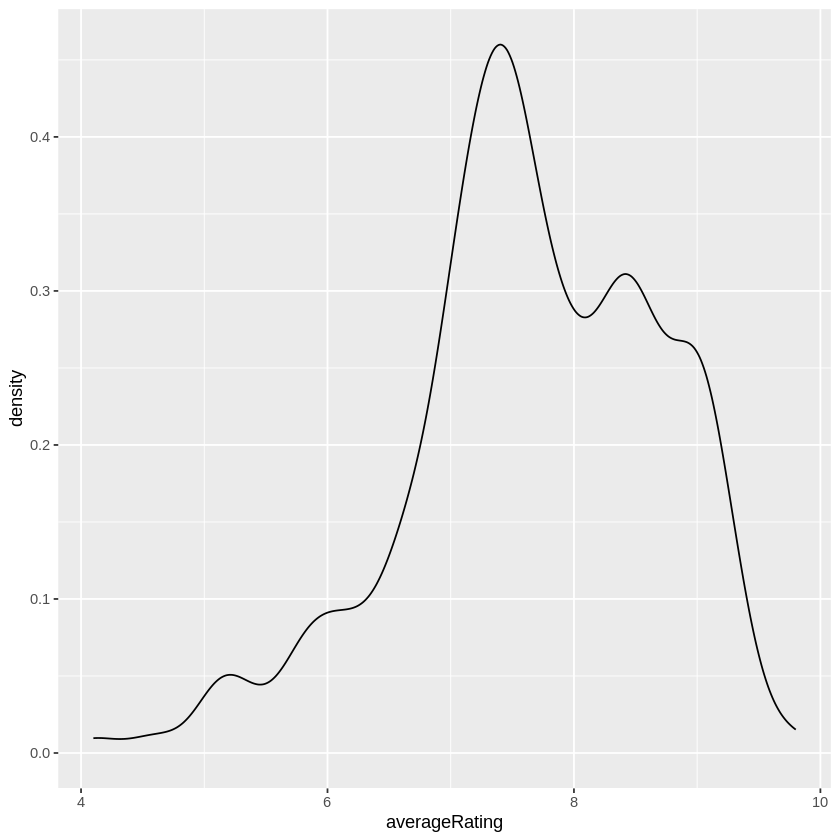

In [18]:
#let's see the ratings distribution
p <- ggplot(DWepcrew, aes(x=averageRating)) + 
  geom_density()
p

In [ ]:
median(DWepcrew$averageRating)

[1] 7.6

**Change rating here bu rerun upper code**

In [16]:
DWepcrew <- DWepcrew[averageRating >= 9.0]
dim(DWepcrew)

[1] 185   4

In [17]:
DWepcrew_count <- DWepcrew[, .N, by = .(nconst)]
#DF[  , .(sum_no = sum(no), unq_age = unique(age)), by = id]
dim(DWepcrew_count)

[1] 67  2

In [19]:
setorder(DWepcrew, cols = "nconst")
head(DWepcrew)

tconst,averageRating,nconst,category
<chr>,<dbl>,<chr>,<chr>
tt2779318,9.3,nm0000457,actor
tt3332546,9.0,nm0000457,actor
tt0562995,9.0,nm0001172,actor
tt0562996,9.0,nm0001172,actor
tt0563000,9.0,nm0001172,actor
tt2267346,9.0,nm0001290,actor


In [20]:
nodesDW <- unique(DWepcrew, by = "nconst") #wait, calc how many times they repeat
nodesDW <- merge(nodesDW, DWepcrew_count, by.x = "nconst", by.y = "nconst", all=FALSE)
setorder(nodesDW, cols = "nconst")

In [21]:
nodesDW <- nodesDW[, .(nconst, category, N)]
#nodesDW <- nodesDW[1:100,]
head(nodesDW)
dim(nodesDW)

nconst,category,N
<chr>,<chr>,<int>
nm0000457,actor,2
nm0001172,actor,3
nm0001290,actor,1
nm0001524,actor,1
nm0003080,director,2
nm0005094,actress,7


[1] 67  3

In [175]:
unique(nodesDW$category)

[1] "actor"    "director" "actress"  "writer"

### Tiny test
**Trying out on tiny test data**

In [ ]:
#tiny test data
DT = data.table(
  tconst = c("t1","t1","t1","t2","t1","t2"),
  nconst = c(1,2,3,3,4,5),
  cat = c("dir", "wri", "act", "act", "wri", "dir")
)
DT

tconst,nconst,cat
<chr>,<dbl>,<chr>
t1,1,dir
t1,2,wri
t1,3,act
t2,3,act
t1,4,wri
t2,5,dir


In [ ]:
DTepcrew_count <- DT[, .N, by = .(nconst)]
nodesDT <- unique(DT, by = "nconst") #wait, calc how many times they repeat
nodesDT <- merge(nodesDT, DTepcrew_count, by.x = "nconst", by.y = "nconst", all=FALSE)
setorder(nodesDT, cols = "nconst")
nodesDT

nconst,tconst,cat,N
<dbl>,<chr>,<chr>,<int>
1,t1,dir,1
2,t1,wri,1
3,t1,act,2
4,t1,wri,1
5,t2,dir,1


In [ ]:
linksDT <- DT %>% select(tconst, nconst, cat) %>%
  inner_join(., select(., tconst, nconst), by="tconst") %>%
  rename(FROM = nconst.x, TO = nconst.y) %>%
  filter(FROM != TO) %>%
  unique 

In [ ]:
unique(linksDT[,c('FROM','TO')])

FROM,TO
<dbl>,<dbl>
1,2
1,3
1,4
2,1
2,3
2,4
3,1
3,2
3,4


In [ ]:
justlinksDT <- linksDT[, .(FROM, TO)]
#justlinksDT <- justlinksDT[, jung := paste(FROM,TO)] #simboliu jungimas
#justlinksDT <- justlinksDT[, jung2 := paste(TO,FROM)]

In [ ]:
justlinksDT

FROM,TO
<dbl>,<dbl>
1,2
1,3
1,4
2,1
2,3
2,4
3,1
3,2
3,4


In [ ]:
a <- nrow(justlinksDT)
a <- a - 2
k <- 2
from <- justlinksDT[1,1]
to <- justlinksDT[1,2]
edg <- data.frame(from,to)
i <- 2
j <- 3
a

[1] 12

In [ ]:
for (l in a){
  for (h in k:a-1){
      if((justlinksDT[i,1] == justlinksDT[j,2]) & (justlinksDT[i,2] == justlinksDT[j,1])){
        f <- justlinksDT[i,1]
        t <- justlinksDT[i,2]
        edg[nrow(edg) + 1,] = c(f,t)
      }
      j <- j + 1
  }
  i <- i + 1
  k <- k + 1
}

In [ ]:
edg

,FROM,TO
,<dbl>,<dbl>
1,1,2
2,1,3


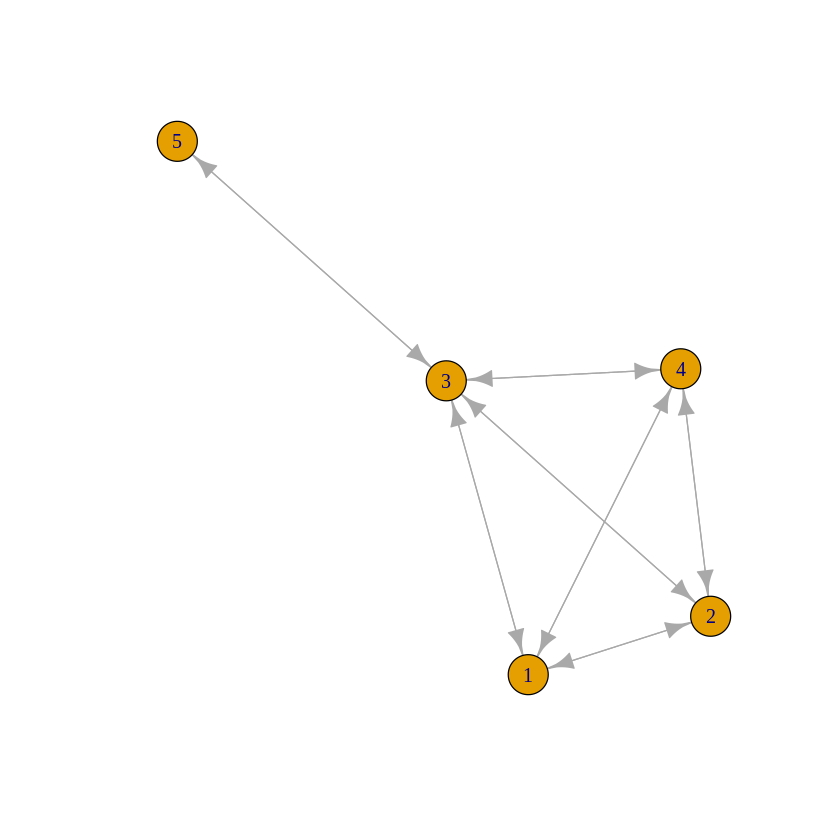

In [ ]:
network <- graph_from_data_frame(d=justlinksDT, directed=T) 
plot(network)

**End of test**

### Merging a table on itself to get links by tconst

In [23]:
linksDW <- DWepcrew %>% select(tconst, nconst, averageRating) %>%
  inner_join(., select(., tconst, nconst), by="tconst") %>%
  rename(FROM = nconst.x, TO = nconst.y) %>%
  filter(FROM != TO) %>%
  unique %>%
  arrange(tconst)

In [24]:
head(linksDW, 10)
dim(linksDW)

tconst,FROM,averageRating,TO
<chr>,<chr>,<dbl>,<chr>
tt0562995,nm0001172,9,nm0369949
tt0562995,nm0001172,9,nm0387524
tt0562995,nm0001172,9,nm0595590
tt0562995,nm0001172,9,nm0628285
tt0562995,nm0001172,9,nm0684877
tt0562995,nm0001172,9,nm1807287
tt0562995,nm0369949,9,nm0001172
tt0562995,nm0369949,9,nm0387524
tt0562995,nm0369949,9,nm0595590


[1] 1334    4

In [25]:
justlinksDW <- linksDW[, .(FROM, TO)]
setnames(justlinksDW, old = c('FROM', 'TO'), 
         new = c('from','to'))
dim(justlinksDW)

[1] 1334    2

In [26]:
install.packages("igraph")
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following object is masked from ‘package:tidyr’:

    crossing


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following object is masked from ‘package:R.oo’:

    hierarchy


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [ ]:
network <- graph_from_data_frame(d=justlinksDW, directed=T) 
plot(network)
#TODO color these differently
#get rid of double connections

In [193]:
head(nodesDW)

nconst,category,N
<chr>,<chr>,<int>
nm0000457,actor,2
nm0001096,actor,1
nm0001172,actor,5
nm0001290,actor,1
nm0001394,actor,1
nm0001524,actor,1


### Actual graph

In [111]:
#run this later
#mygraph <- graph_from_data_frame( hierarchy, vertices=vertices )
# This is a network object, you visualize it as a network like shown in the network section!
 
# With igraph: 
#plot(mygraph, vertex.label="", edge.arrow.size=0, vertex.size=2)
 
# With ggraph:
#ggraph(mygraph, layout = 'dendrogram', circular = FALSE) + 
  #geom_edge_link() +
  #theme_void()

ERROR: ignored

In [27]:
install.packages('RColorBrewer')
library(RColorBrewer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [199]:
# let's increase the size of the plot
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res = 200)

In [233]:
head(hierarchy)
hierarchy <- hierarchy[
  with(hierarchy, order(from, to)),
]

,from,to,N
,<chr>,<chr>,<int>
1,origin,actor,NA
2,origin,actress,NA
3,origin,director,NA
4,origin,writer,NA
5,actor,nm0000457,2
6,actor,nm0001096,1


In [ ]:
vertices

In [161]:
#MAKING OF THE GRAPH STARTS HERE
d1 <- data.frame(from="origin", to=c("actor","actress","director","writer"), N=NA)
d2 <- data.frame(from=nodesDW$category, to=nodesDW$nconst, N=nodesDW$N)
hierarchy <- rbind(d1, d2) #edges
all_leaves <- paste("subgroup", seq(1,100), sep="_")

vertices <- data.frame(name = unique(c(as.character(hierarchy$from), as.character(hierarchy$to))),value=runif(72))
vertices$group  <-  hierarchy$from[ match( vertices$name, hierarchy$to ) ]
vertices$N <- hierarchy$N[ match( vertices$name, hierarchy$to ) ]

connect <- justlinksDW
connect$value <-linksDW$averageRating #value is not taken from here
 

In [31]:
#run this later
mygraph <- graph_from_data_frame( hierarchy, vertices=vertices )

# The connection object must refer to the ids of the leaves:
from <- match( connect$from, vertices$name)
to <- match( connect$to, vertices$name)
col <- connect$value #fixes the value problem!

In [ ]:
# plot basic
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_conn_bundle(data = get_con(from = from, to = to, col=col), aes(colour=col, alpha = col, width = col), tension = 0) + 
  geom_node_point(aes(filter = leaf, x = x*1.05, y=y*1.05,colour=group)) +
  scale_colour_manual(values= rep( brewer.pal(4,"Paired") , 2)) +

  theme_void()
 
# plot
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_conn_bundle(data = get_con(from = from, to = to, col=col), aes(colour=col, alpha = col), tension = 0.7) + 
  scale_edge_color_continuous(low="rosybrown1", high="purple1") +
  geom_node_point(aes(filter = leaf, x = x*1.05, y=y*1.05, colour=group, size=N, alpha=0.2)) +
  scale_colour_manual(values= rep( brewer.pal(5,"Accent") , 30)) +
  scale_size_continuous( range = c(4,10) ) + #changes the N size
  theme_void()

#should there be a legend?

In [162]:
#Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip
#calculate the ANGLE of the labels
vertices$id <- NA
myleaves <- which(is.na( match(vertices$name, hierarchy$from) ))
nleaves <- length(myleaves)
vertices$id[ myleaves ] <- seq(1:nleaves)
vertices$angle <- 90 - 360 * vertices$id / nleaves
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
vertices$hjust <- ifelse( vertices$angle < -90, 1, 0)
 
# flip angle BY to make them readable
vertices$angle <- ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)

In [165]:
nleaves

[1] 67

In [163]:
vertices$angle

[1]         NA         NA         NA         NA         NA  84.626866
 [7]  79.253731  73.880597  68.507463  63.134328  57.761194  52.388060
[13]  47.014925  41.641791  36.268657  30.895522  25.522388  20.149254
[19]  14.776119   9.402985   4.029851  -1.343284  -6.716418 -12.089552
[25] -17.462687 -22.835821 -28.208955 -33.582090 -38.955224 -44.328358
[31] -49.701493 -55.074627 -60.447761 -65.820896 -71.194030 -76.567164
[37] -81.940299 -87.313433  87.313433  81.940299  76.567164  71.194030
[43]  65.820896  60.447761  55.074627  49.701493  44.328358  38.955224
[49]  33.582090  28.208955  22.835821  17.462687  12.089552   6.716418
[55]   1.343284  -4.029851  -9.402985 -14.776119 -20.149254 -25.522388
[61] -30.895522 -36.268657 -41.641791 -47.014925 -52.388060 -57.761194
[67] -63.134328 -68.507463 -73.880597 -79.253731 -84.626866 -90.000000

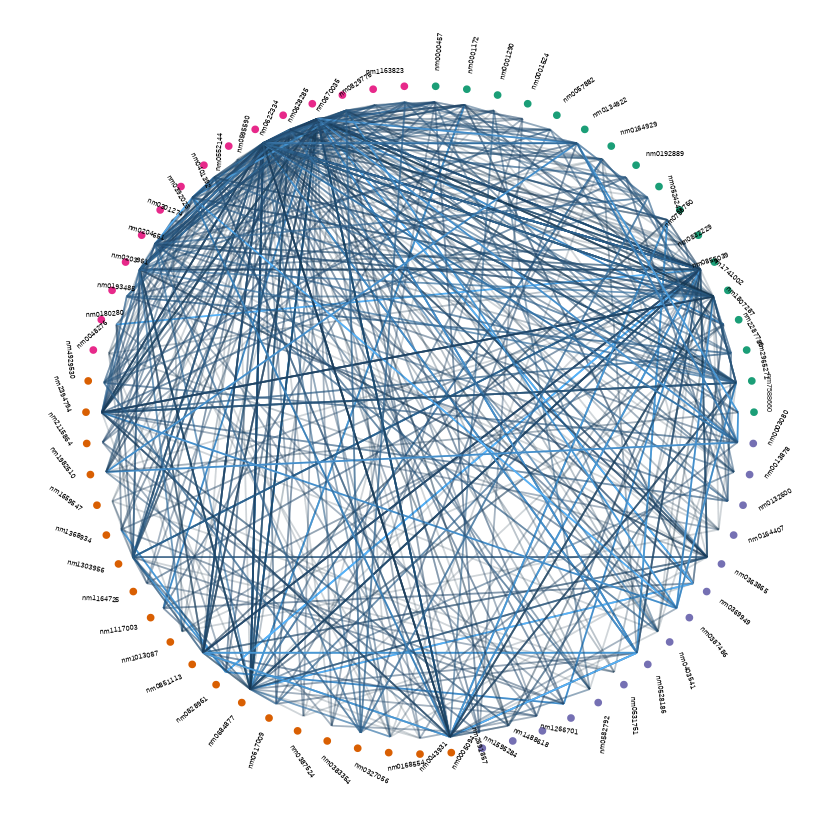

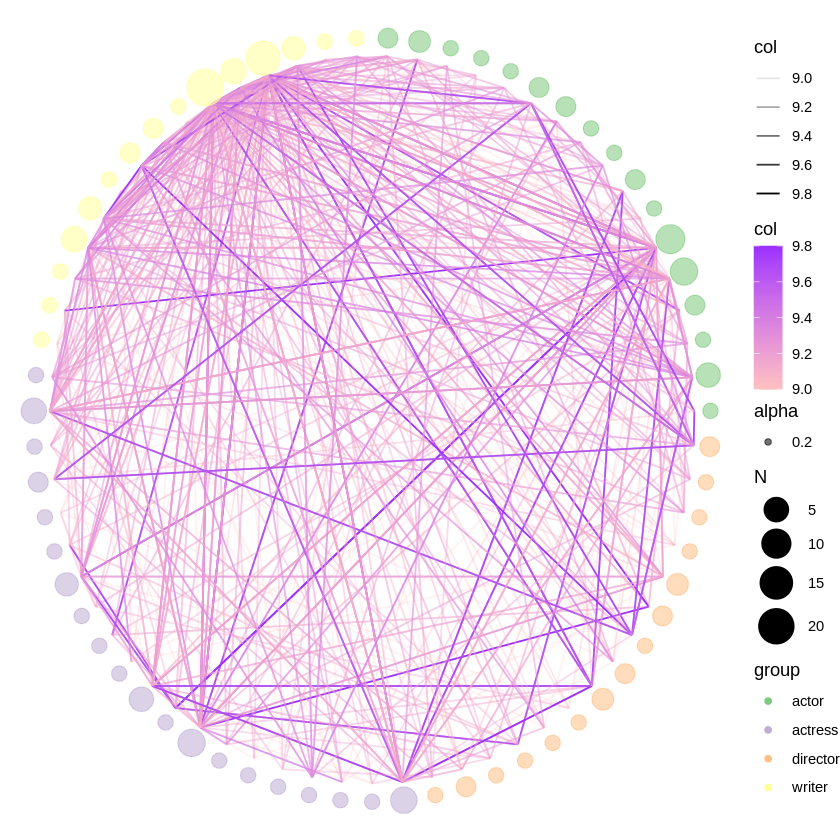

In [54]:
# plot with labels
mygraph <- graph_from_data_frame( hierarchy, vertices=vertices )

from <- match( connect$from, vertices$name) #sort vertices name first?
to <- match( connect$to, vertices$name)
col <- connect$value #fixes the value problem!

ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_conn_bundle(data = get_con(from = from, to = to, col=col), aes(colour=col, alpha = col), tension = 0) + 
  geom_node_point(aes(filter = leaf, x = x*1.05, y=y*1.05,colour=group)) +
  scale_colour_manual(values= rep( brewer.pal(4,"Dark2") , 4)) +
  geom_node_text(aes(x = x*1.1, y=y*1.1, filter = leaf, label=name, angle = angle, hjust=hjust), size=1.5, alpha=1) +
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
  ) +
  expand_limits(x = c(-1.2, 1.2), y = c(-1.2, 1.2))
 
# plot

ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_conn_bundle(data = get_con(from = from, to = to, col=col), aes(colour=col, alpha = col), tension = 0) + 
  scale_edge_color_continuous(low="rosybrown1", high="purple1") +
  geom_node_point(aes(filter = leaf, x = x*1.05, y=y*1.05, colour=group, size=N, alpha=0.2)) +
  scale_colour_manual(values= rep( brewer.pal(5,"Accent") , 30)) +
  scale_size_continuous( range = c(4,10) ) + #changes the N size
  theme_void()

#should there be a legend?

In [ ]:
#coloring etc

## THE EXAMPLE

In [36]:
set.seed(1234)
d1 <- data.frame(from="origin", to=paste("group", seq(1,10), sep=""))
d2 <- data.frame(from=rep(d1$to, each=10), to=paste("subgroup", seq(1,100), sep="_"))
edges <- rbind(d1, d2)
 
# create a dataframe with connection between leaves (individuals)
all_leaves <- paste("subgroup", seq(1,100), sep="_")
connect <- rbind( 
  data.frame( from=sample(all_leaves, 100, replace=T) , to=sample(all_leaves, 100, replace=T)), 
  data.frame( from=sample(head(all_leaves), 30, replace=T) , to=sample( tail(all_leaves), 30, replace=T)), 
  data.frame( from=sample(all_leaves[25:30], 30, replace=T) , to=sample( all_leaves[55:60], 30, replace=T)), 
  data.frame( from=sample(all_leaves[75:80], 30, replace=T) , to=sample( all_leaves[55:60], 30, replace=T)) )
connect$value <- runif(nrow(connect))
 
# create a vertices data.frame. One line per object of our hierarchy
vertices  <-  data.frame(
  name = unique(c(as.character(edges$from), as.character(edges$to))) , 
  value = runif(111)
) 
# Let's add a column with the group of each name. It will be useful later to color points
vertices$group  <-  edges$from[ match( vertices$name, edges$to ) ]

In [ ]:
vertices

In [ ]:
edges

In [226]:
#Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip
#calculate the ANGLE of the labels
vertices$id <- NA
myleaves <- which(is.na( match(vertices$name, edges$from) ))
nleaves <- length(myleaves)
vertices$id[ myleaves ] <- seq(1:nleaves)
vertices$angle <- 90 - 360 * vertices$id / nleaves
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
vertices$hjust <- ifelse( vertices$angle < -90, 1, 0)
 
# flip angle BY to make them readable
vertices$angle <- ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)

In [ ]:
mygraph <- igraph::graph_from_data_frame( edges, vertices=vertices )
 
# The connection object must refer to the ids of the leaves:
from  <-  match( connect$from, vertices$name)
to  <-  match( connect$to, vertices$name)
 
# Basic usual argument
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_node_point(aes(filter = leaf, x = x*1.05, y=y*1.05)) +
  geom_conn_bundle(data = get_con(from = from, to = to), alpha=0.2, colour="skyblue", width=0.9) +
  geom_node_text(aes(x = x*1.1, y=y*1.1, filter = leaf, label=name, angle = angle, hjust=hjust), size=1.5, alpha=1) +
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
  ) +
  expand_limits(x = c(-1.2, 1.2), y = c(-1.2, 1.2))

In [ ]:
ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_conn_bundle(data = get_con(from = from, to = to), alpha=0.2, width=0.9, aes(colour=..index..)) +
  scale_edge_colour_distiller(palette = "RdPu") +
  
  geom_node_text(aes(x = x*1.15, y=y*1.15, filter = leaf, label=name, angle = angle, hjust=hjust, colour=group), size=2, alpha=1) +
  
  geom_node_point(aes(filter = leaf, x = x*1.07, y=y*1.07, colour=group, size=value, alpha=0.2)) +
  scale_colour_manual(values= rep( brewer.pal(9,"Paired") , 30)) +
  scale_size_continuous( range = c(0.1,10) ) +
  
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
  ) +
  expand_limits(x = c(-1.3, 1.3), y = c(-1.3, 1.3))

In [132]:
DT = data.table(
  tconst = c("t1","t1","t1","t2","t1","t2"),
  nconst = c(1,2,3,3,4,5),
  category = c("director", "writer", "actor", "actor", "writer", "director"),
  averageRating = c(8,8,8,9,8,9)
)
DT

tconst,nconst,category,averageRating
<chr>,<dbl>,<chr>,<dbl>
t1,1,director,8
t1,2,writer,8
t1,3,actor,8
t2,3,actor,9
t1,4,writer,8
t2,5,director,9


In [133]:
DTepcrew_count <- DT[, .N, by = .(nconst)]
nodesDT <- unique(DT, by = "nconst") #wait, calc how many times they repeat
nodesDT <- merge(nodesDT, DTepcrew_count, by.x = "nconst", by.y = "nconst", all=FALSE)
setorder(nodesDT, cols = "nconst")
nodesDT

nconst,tconst,category,averageRating,N
<dbl>,<chr>,<chr>,<dbl>,<int>
1,t1,director,8,1
2,t1,writer,8,1
3,t1,actor,8,2
4,t1,writer,8,1
5,t2,director,9,1


In [134]:
linksDT <- DT %>% select(tconst, nconst, category, averageRating) %>%
  inner_join(., select(., tconst, nconst), by="tconst") %>%
  rename(FROM = nconst.x, TO = nconst.y) %>%
  filter(FROM != TO) %>%
  unique 

In [135]:
justlinksDT <- linksDT[, .(FROM, TO)]
setnames(justlinksDT, old = c('FROM', 'TO'), 
         new = c('from','to'))
dim(justlinksDT)

[1] 14  2

In [136]:
linksDT

tconst,FROM,category,averageRating,TO
<chr>,<dbl>,<chr>,<dbl>,<dbl>
t1,1,director,8,2
t1,1,director,8,3
t1,1,director,8,4
t1,2,writer,8,1
t1,2,writer,8,3
t1,2,writer,8,4
t1,3,actor,8,1
t1,3,actor,8,2
t1,3,actor,8,4


In [156]:
d1 <- data.frame(from="origin", to=c("actor","director","writer"), N=NA)
d2 <- data.frame(from=nodesDT$category, to=nodesDT$nconst, N=nodesDT$N)
hierarchy <- rbind(d1, d2) #edges

vertices <- data.frame(name = unique(c(as.character(hierarchy$from), as.character(hierarchy$to))),value=runif(9))
vertices$group  <-  hierarchy$from[ match( vertices$name, hierarchy$to ) ]
vertices$N <- hierarchy$N[ match( vertices$name, hierarchy$to ) ]
#setorder(vertices, cols = "group")
#vertices <- vertices[vertices$group != "NA" & vertices$group != "origin", ]

#with each graph we have to look how vertices are sorted by groups first
setDT(vertices)
n <-vertices[name == "origin"]
o <- vertices[group == "origin"]
d <- vertices[group == "director"]
w <- vertices[group == "writer"]
a <-vertices[group == "actor"]
vertices <- rbind(n,o,d,w,a)
setDF(vertices) 

connect <- justlinksDT
connect$value <-linksDT$averageRating #value is not taken from here

In [157]:
vertices

name,value,group,N
<chr>,<dbl>,<chr>,<int>
origin,0.5183985,NA,NA
director,0.5965233,origin,NA
writer,0.3070303,origin,NA
actor,0.6445946,origin,NA
1,0.3819172,director,1
5,0.1978659,director,1
2,0.5929904,writer,1
4,0.3002816,writer,1
3,0.7947221,actor,2


In [158]:
#Let's add information concerning the label we are going to add: angle, horizontal adjustement and potential flip
#calculate the ANGLE of the labels
vertices$id <- NA
myleaves <- which(is.na( match(vertices$name, hierarchy$from) ))
nleaves <- length(myleaves)
vertices$id[ myleaves ] <- seq(1:nleaves)
vertices$angle <- 126 - 360 * vertices$id / nleaves
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
vertices$hjust <- ifelse( vertices$angle < -90, 1, 0)
 
# flip angle BY to make them readable
vertices$angle <- ifelse(vertices$angle < -90, vertices$angle+180, vertices$angle)

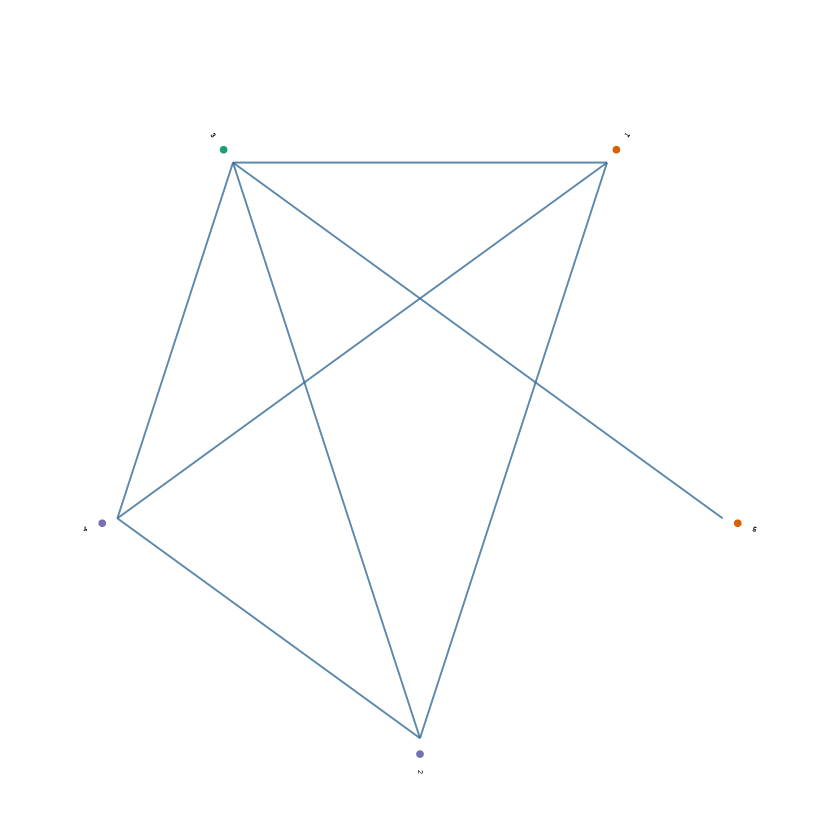

In [159]:
mygraph <- graph_from_data_frame( hierarchy, vertices=vertices )

from <- match( connect$from, vertices$name) #sort vertices name first?
to <- match( connect$to, vertices$name)
col <- connect$value #fixes the value problem!

ggraph(mygraph, layout = 'dendrogram', circular = TRUE) + 
  geom_conn_bundle(data = get_con(from = from, to = to, col=col), aes(colour=col, alpha = col), tension = 0) + 
  geom_node_point(aes(filter = leaf, x = x*1.05, y=y*1.05,colour=group)) +
  scale_colour_manual(values= rep( brewer.pal(4,"Dark2") , 4)) +
  geom_node_text(aes(x = x*1.1, y=y*1.1, filter = leaf, label=name, angle = angle, hjust=hjust), size=1.5, alpha=1) +
  theme_void() +
  theme(
    legend.position="none",
    plot.margin=unit(c(0,0,0,0),"cm"),
  ) +
  expand_limits(x = c(-1.2, 1.2), y = c(-1.2, 1.2))

In [160]:
vertices #VISKAS AISKU

name,value,group,N,id,angle,hjust
<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>
origin,0.5183985,NA,NA,NA,NA,NA
director,0.5965233,origin,NA,NA,NA,NA
writer,0.3070303,origin,NA,NA,NA,NA
actor,0.6445946,origin,NA,NA,NA,NA
1,0.3819172,director,1,1,54,0
5,0.1978659,director,1,2,-18,0
2,0.5929904,writer,1,3,-90,0
4,0.3002816,writer,1,4,18,1
3,0.7947221,actor,2,5,-54,1


In [117]:
setorder(vertices, cols = group)
#vertices <- vertices[vertices$group != "NA" & vertices$group != "origin", ] 
#vertices <- vertices[
 # with(vertices, order(name, group)),
#]

In [120]:
setDT(vertices)

In [124]:
setDT(vertices)
o <-vertices[group == "NA"]
o <- vertices[group == "origin"]
d <- vertices[group == "director"]
w <- vertices[group == "writer"]
a <-vertices[group == "actor"]
verticesN <- rbind(n,o,d,w,a)
setDF(verticesN)

In [130]:
verticesN

name,value,group,N,id,angle,hjust
<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>
origin,0.61436836,NA,NA,NA,NA,NA
actor,0.31380989,origin,NA,NA,NA,NA
director,0.20012561,origin,NA,NA,NA,NA
writer,0.90892691,origin,NA,NA,NA,NA
1,0.18370321,director,1,2,-18,0
5,0.03824145,director,1,3,-90,0
2,0.92132083,writer,1,4,18,1
4,0.61353494,writer,1,5,-54,1
3,0.41185982,actor,2,1,54,0


o tu dieve, pirma reik padaryt, kad rikiavimas butu director, writer, actor ??

## Do attractive popular actors have bigger ratings on average? Everything depends if the avg_rating was calculated correctly

### Box Office Stars (data from the outside!)

In [ ]:
downloaded_file <- drive_download("BoxOfficeStars.tsv")

In [ ]:
bos <- fread("BoxOfficeStars.tsv")

In [ ]:
head(bos)
head(nmf)

Rank,Name,WorldwideBoxOffice,Movies,Average
<int>,<chr>,<chr>,<int>,<chr>
1,Scarlett Johansson,"$14,522,754,504",34,"$427,139,838"
2,Robert Downey Jr.,"$14,396,065,966",43,"$334,792,232"
3,Samuel L. Jackson,"$14,366,169,081",64,"$224,471,392"
4,Chris Hemsworth,"$11,945,886,832",25,"$477,835,473"
5,Chris Pratt,"$11,745,130,231",21,"$559,291,916"
6,Tom Cruise,"$11,546,807,794",43,"$268,530,414"


nconst,primaryName,birthYear,deathYear,primaryProfession,ratings_total,avg_rating,n
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
nm1217514,Rodrigo Ordoñez,1972,\N,"writer,director,assistant_director",358,6.375,4
nm1217515,Suze Orman,1951,\N,"producer,actress",528315,7.925,4
nm1217519,Yaky Ortega,\N,\N,"director,miscellaneous",468,7.03333333333333,4
nm1217520,David Ortkiese,\N,\N,"camera_department,cinematographer,director",89978,4.875,4
nm12175321,Christa Biyela,\N,\N,writer,8,7.5,1
nm1217536,Susanna Palin,\N,\N,"assistant_director,writer,soundtrack",1741,4.5,4


In [ ]:
dim(bos)

[1] 500   5

In [ ]:
bos[bos == "Robert Downey, Jr."] <- "Robert Downey Jr."

In [ ]:
#can I find actors by names? YES
nmf[primaryName == "Samuel L. Jackson"]

nconst,primaryName,birthYear,deathYear,primaryProfession,ratings_total,avg_rating,n
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
nm0000168,Samuel L. Jackson,1948,\N,"actor,producer,soundtrack",3311403,7.25,4


In [ ]:
box_actors <- merge(bos, nmf, by.x = "Name", by.y = "primaryName", all=FALSE)

In [ ]:
#box_actors <- box_actors %>% mutate(primaryProfession = strsplit(primaryProfession, split=','))
head(box_actors,10)
dim(box_actors)

Name,Rank,WorldwideBoxOffice,Movies,Average,nconst,birthYear,deathYear,primaryProfession,ratings_total,avg_rating,n
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
Aaron Eckhart,459,"$1,104,552,881",23,"$48,024,038",nm0001173,1968,\N,"actor,producer,soundtrack",2990723,7.25,4
Aaron Taylor-Johnson,179,"$2,522,182,027",11,"$229,289,275",nm1093951,1990,\N,"actor,producer,soundtrack",1148121,7.175,4
Adam Driver,70,"$4,887,453,665",20,"$244,372,683",nm3485845,1983,\N,"actor,soundtrack",1937133,7.475,4
Adam Sandler,59,"$5,236,489,739",42,"$124,678,327",nm1578488,\N,\N,"director,producer,editorial_department",3941,6.86666666666667,4
Adam Sandler,59,"$5,236,489,739",42,"$124,678,327",nm0001191,1966,\N,"actor,producer,writer",639008,6.175,4
Adewale Akinnuoye-Agbaje,466,"$1,076,435,674",4,"$269,108,919",nm0015382,1967,\N,"actor,writer,director",1554,6.1,1
Al Pacino,195,"$2,402,150,961",44,"$54,594,340",nm0000199,1940,\N,"actor,producer,soundtrack",2276766,7.775,4
Alan Rickman,197,"$2,375,267,745",9,"$263,918,638",nm0000614,1946,2016,"actor,soundtrack,writer",2297834,7.625,4
Alan Tudyk,150,"$2,987,122,326",9,"$331,902,481",nm0876138,1971,\N,"actor,writer,producer",1615758,7.7,4


[1] 517  12

In [ ]:
box_actors <- box_actors %>% separate(primaryProfession, c('pp1', 'pp2','pp3')) #a way to split nicely

Warning message:
“Expected 3 pieces. Additional pieces discarded in 28 rows [4, 50, 83, 88, 102, 120, 145, 182, 202, 210, 260, 272, 279, 290, 298, 336, 338, 369, 381, 398, ...].”
Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 78 rows [3, 19, 22, 32, 40, 43, 61, 68, 73, 80, 94, 105, 113, 134, 143, 147, 149, 153, 155, 163, ...].”


In [ ]:
head(box_actors)

Name,Rank,WorldwideBoxOffice,Movies,Average,nconst,birthYear,deathYear,pp1,pp2,pp3,ratings_total,avg_rating,n
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
Aaron Eckhart,459,"$1,104,552,881",23,"$48,024,038",nm0001173,1968,\N,actor,producer,soundtrack,2990723,7.25,4
Aaron Taylor-Johnson,179,"$2,522,182,027",11,"$229,289,275",nm1093951,1990,\N,actor,producer,soundtrack,1148121,7.175,4
Adam Driver,70,"$4,887,453,665",20,"$244,372,683",nm3485845,1983,\N,actor,soundtrack,NA,1937133,7.475,4
Adam Sandler,59,"$5,236,489,739",42,"$124,678,327",nm1578488,\N,\N,director,producer,editorial,3941,6.86666666666667,4
Adam Sandler,59,"$5,236,489,739",42,"$124,678,327",nm0001191,1966,\N,actor,producer,writer,639008,6.175,4
Adewale Akinnuoye-Agbaje,466,"$1,076,435,674",4,"$269,108,919",nm0015382,1967,\N,actor,writer,director,1554,6.1,1


In [ ]:
unique(box_actors$pp1)

[1] "actor"         "director"      "actress"       "soundtrack"   
 [5] "writer"        "producer"      "animation"     "visual"       
 [9] ""              "script"        "editor"        "miscellaneous"
[13] "music"

In [ ]:
#not necessary to do this imo
#box_actors <- merge(box_actors, principals, by.x = "nconst", by.y = "nconst", all=FALSE)

In [ ]:
#baf <- box_actors[pp1 == 'actor' | pp2 == 'actor' | pp3 == 'actor' | pp1 == 'actress' | pp2 == 'actress'| pp3 == 'actress'] some are still duplicates...
baf <- box_actors[pp1 == 'actor' | pp1 == 'actress']
head(baf)
dim(baf)

Name,Rank,WorldwideBoxOffice,Movies,Average,nconst,birthYear,deathYear,pp1,pp2,pp3,ratings_total,avg_rating,n
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
Aaron Eckhart,459,"$1,104,552,881",23,"$48,024,038",nm0001173,1968,\N,actor,producer,soundtrack,2990723,7.25,4
Aaron Taylor-Johnson,179,"$2,522,182,027",11,"$229,289,275",nm1093951,1990,\N,actor,producer,soundtrack,1148121,7.175,4
Adam Driver,70,"$4,887,453,665",20,"$244,372,683",nm3485845,1983,\N,actor,soundtrack,NA,1937133,7.475,4
Adam Sandler,59,"$5,236,489,739",42,"$124,678,327",nm0001191,1966,\N,actor,producer,writer,639008,6.175,4
Adewale Akinnuoye-Agbaje,466,"$1,076,435,674",4,"$269,108,919",nm0015382,1967,\N,actor,writer,director,1554,6.1,1
Al Pacino,195,"$2,402,150,961",44,"$54,594,340",nm0000199,1940,\N,actor,producer,soundtrack,2276766,7.775,4


[1] 439  14

In [ ]:
setorder(baf, cols = "Rank") #fast way to order a data table
head(baf)

Name,Rank,WorldwideBoxOffice,Movies,Average,nconst,birthYear,deathYear,pp1,pp2,pp3,ratings_total,avg_rating,n
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
Scarlett Johansson,1,"$14,522,754,504",34,"$427,139,838",nm0424060,1984,\N,actress,soundtrack,producer,2582870,7.5,4
Robert Downey Jr.,2,"$14,396,065,966",43,"$334,792,232",nm0000375,1965,\N,actor,producer,soundtrack,3902151,7.65,4
Samuel L. Jackson,3,"$14,366,169,081",64,"$224,471,392",nm0000168,1948,\N,actor,producer,soundtrack,3311403,7.25,4
Chris Hemsworth,4,"$11,945,886,832",25,"$477,835,473",nm1165110,1983,\N,actor,producer,soundtrack,3012517,7.475,4
Chris Pratt,5,"$11,745,130,231",21,"$559,291,916",nm0695435,1979,\N,actress,soundtrack,producer,2090529,7.6,4
Tom Cruise,6,"$11,546,807,794",43,"$268,530,414",nm0000129,1962,\N,actor,producer,soundtrack,1475417,7.025,4


In [ ]:
baf100 <- baf[1:100]
head(baf100)
dim(baf100)

Name,Rank,WorldwideBoxOffice,Movies,Average,nconst,birthYear,deathYear,pp1,pp2,pp3,ratings_total,avg_rating,n
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
Scarlett Johansson,1,"$14,522,754,504",34,"$427,139,838",nm0424060,1984,\N,actress,soundtrack,producer,2582870,7.5,4
Robert Downey Jr.,2,"$14,396,065,966",43,"$334,792,232",nm0000375,1965,\N,actor,producer,soundtrack,3902151,7.65,4
Samuel L. Jackson,3,"$14,366,169,081",64,"$224,471,392",nm0000168,1948,\N,actor,producer,soundtrack,3311403,7.25,4
Chris Hemsworth,4,"$11,945,886,832",25,"$477,835,473",nm1165110,1983,\N,actor,producer,soundtrack,3012517,7.475,4
Chris Pratt,5,"$11,745,130,231",21,"$559,291,916",nm0695435,1979,\N,actress,soundtrack,producer,2090529,7.6,4
Tom Cruise,6,"$11,546,807,794",43,"$268,530,414",nm0000129,1962,\N,actor,producer,soundtrack,1475417,7.025,4


[1] 100  14

In [ ]:
#for plotting
#baf100_toplot <- baf100[, .(Rank,ratings_total, avg_rating)]
baf100_toplot <- baf100[, avg_rating]
baf100_toplot <- data.frame(baf100_toplot)
#baf100_toplot I am plotting more stuff together later

**IT WILL BE PLOTTED LATER**

### Box office stars compared to "attractive stars"

In [ ]:
downloaded_file <- drive_download("Top100Actors.csv")

In [ ]:
top100m <- fread("Top100Actors.csv")

In [ ]:
downloaded_file <- drive_download("Top100Actresses.csv")
top100f <- fread("Top100Actresses.csv")

Auto-refreshing stale OAuth token.



ERROR: ignored

In [ ]:
top100f <- top100f[1:100]
dim(top100f)

[1] 100   8

In [ ]:
#top 200 attractive actors and actresses
hot <- rbindlist(list(top100f, top100m))  #adding two tables vertically
hot <- hot[, .(Position,Const,Name)] 
head(hot)

Position,Const,Name
<int>,<chr>,<chr>
1,nm1312575,Olivia Wilde
2,nm0817844,Abigail Spencer
3,nm0004695,Jessica Alba
4,nm0424060,Scarlett Johansson
5,nm0005154,Lucy Liu
6,nm0000124,Jennifer Connelly


In [ ]:
hot_actors <- merge(hot, nmf, by.x = "Const", by.y = "nconst", all=FALSE)
head(hot_actors)
dim(hot_actors)

Const,Position,Name,primaryName,birthYear,deathYear,primaryProfession,ratings_total,avg_rating,n
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
nm0000008,91,Marlon Brando,Marlon Brando,1924,2004,"actor,soundtrack,director",2706269,8.175,4
nm0000056,9,Paul Newman,Paul Newman,1925,2008,"actor,producer,director",411559,7.675,4
nm0000093,31,Brad Pitt,Brad Pitt,1963,\N,"actor,producer,soundtrack",1764419,7.15,4
nm0000113,84,Sandra Bullock,Sandra Bullock,1964,\N,"producer,actress,soundtrack",1722159,7,4
nm0000119,50,Tia Carrere,Tia Carrere,1967,\N,"actress,soundtrack,producer",612986,7,4
nm0000123,61,George Clooney,George Clooney,1961,\N,"actor,producer,director",823252,7.275,4


[1] 182  10

In [ ]:
hot_in_baf <- merge(hot, baf100, by.x = "Const", by.y = "nconst", all=FALSE)

In [ ]:
head(hot_in_baf) #27 of them already in baf100
const_to_delete <- hot_in_baf$Const
const_to_delete

Const,Position,Name.x,Name.y,Rank,WorldwideBoxOffice,Movies,Average,birthYear,deathYear,pp1,pp2,pp3,ratings_total,avg_rating,n
<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
nm0000093,31,Brad Pitt,Brad Pitt,36,"$6,859,342,026",43,"$159,519,582",1963,\N,actor,producer,soundtrack,1764419,7.15,4
nm0000123,61,George Clooney,George Clooney,79,"$4,704,932,208",34,"$138,380,359",1961,\N,actor,producer,director,823252,7.275,4
nm0000129,89,Tom Cruise,Tom Cruise,6,"$11,546,807,794",43,"$268,530,414",1962,\N,actor,producer,soundtrack,1475417,7.025,4
nm0000136,24,Johnny Depp,Johnny Depp,12,"$10,323,947,911",52,"$198,537,460",1963,\N,actor,producer,soundtrack,2849164,7.45,4
nm0000138,25,Leonardo DiCaprio,Leonardo DiCaprio,32,"$7,101,486,511",27,"$263,018,019",1974,\N,actor,producer,soundtrack,6176430,8.35,4
nm0000139,92,Cameron Diaz,Cameron Diaz,49,"$5,827,319,895",28,"$208,118,568",1972,\N,actress,producer,soundtrack,908733,6.475,4


[1] "nm0000093" "nm0000123" "nm0000129" "nm0000136" "nm0000138" "nm0000139"
 [7] "nm0000146" "nm0000179" "nm0000191" "nm0000204" "nm0000206" "nm0000210"
[13] "nm0000246" "nm0000288" "nm0000553" "nm0000569" "nm0001401" "nm0005562"
[19] "nm0177896" "nm0185819" "nm0413168" "nm0424060" "nm0461136" "nm0705356"
[25] "nm0719637" "nm0757855" "nm1500155"

In [ ]:
head(baf)

Name,Rank,WorldwideBoxOffice,Movies,Average,nconst,birthYear,deathYear,pp1,pp2,pp3,ratings_total,avg_rating,n
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
Scarlett Johansson,1,"$14,522,754,504",34,"$427,139,838",nm0424060,1984,\N,actress,soundtrack,producer,2582870,7.5,4
Robert Downey Jr.,2,"$14,396,065,966",43,"$334,792,232",nm0000375,1965,\N,actor,producer,soundtrack,3902151,7.65,4
Samuel L. Jackson,3,"$14,366,169,081",64,"$224,471,392",nm0000168,1948,\N,actor,producer,soundtrack,3311403,7.25,4
Chris Hemsworth,4,"$11,945,886,832",25,"$477,835,473",nm1165110,1983,\N,actor,producer,soundtrack,3012517,7.475,4
Chris Pratt,5,"$11,745,130,231",21,"$559,291,916",nm0695435,1979,\N,actress,soundtrack,producer,2090529,7.6,4
Tom Cruise,6,"$11,546,807,794",43,"$268,530,414",nm0000129,1962,\N,actor,producer,soundtrack,1475417,7.025,4


In [ ]:
#so not that many
#let's make two seperate tables where the person does not repeat, aka remove them from baf table
#data <- data[ menuitem != 'coffee' | amount > 0] 
baf <- baf[nconst != const_to_delete]

Warning message in nconst != const_to_delete:
“longer object length is not a multiple of shorter object length”


In [ ]:
bafnohot <- baf[ !(baf$nconst %in% const_to_delete), ] #nice way to delete rows on condition

In [ ]:
dim(bafnohot) #412 + 27 = 439 correct

[1] 412  14

In [ ]:
head(bafnohot) #whoever made the "attractive" people list, doesn't have eyes

Name,Rank,WorldwideBoxOffice,Movies,Average,nconst,birthYear,deathYear,pp1,pp2,pp3,ratings_total,avg_rating,n
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
Robert Downey Jr.,2,"$14,396,065,966",43,"$334,792,232",nm0000375,1965,\N,actor,producer,soundtrack,3902151,7.65,4
Samuel L. Jackson,3,"$14,366,169,081",64,"$224,471,392",nm0000168,1948,\N,actor,producer,soundtrack,3311403,7.25,4
Chris Hemsworth,4,"$11,945,886,832",25,"$477,835,473",nm1165110,1983,\N,actor,producer,soundtrack,3012517,7.475,4
Chris Pratt,5,"$11,745,130,231",21,"$559,291,916",nm0695435,1979,\N,actress,soundtrack,producer,2090529,7.6,4
Chris Evans,7,"$11,280,741,759",29,"$388,991,095",nm0262635,1981,\N,actor,producer,soundtrack,3849918,7.5,4
Dwayne Johnson,13,"$10,164,132,252",36,"$282,337,007",nm0425005,1972,\N,actor,producer,soundtrack,995234,6.475,4


In [ ]:
bafnohot[Name == "Brad Pitt"] #correct, he shouldn't be here

Name,Rank,WorldwideBoxOffice,Movies,Average,nconst,birthYear,deathYear,pp1,pp2,pp3,ratings_total,avg_rating,n
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>


In [ ]:
bafnohot <- bafnohot[, .(ratings_total, avg_rating)]
dim(bafnohot)
hot_in_baf <- hot_in_baf[, .(ratings_total, avg_rating)]
dim(hot_in_baf)
hot_actors <- hot_actors[, .(ratings_total, avg_rating)]
dim(hot_actors)

[1] 412   2

[1] 27  2

[1] 182   2

In [ ]:
bafnohot[, group := "bafnohot"]
hot_actors[, group := "hot"]
hot_in_baf[,group := "hotbaf"]
toplot <- rbindlist(list(bafnohot, hot_actors, hot_in_baf))  #important to do if we want to get a plot:))

In [ ]:
toplot$avg_rating <- as.numeric(toplot$avg_rating)
head(toplot)

ratings_total,avg_rating,group
<int>,<dbl>,<chr>
3902151,7.650,bafnohot
3311403,7.250,bafnohot
3012517,7.475,bafnohot
2090529,7.600,bafnohot
3849918,7.500,bafnohot
995234,6.475,bafnohot


In [ ]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

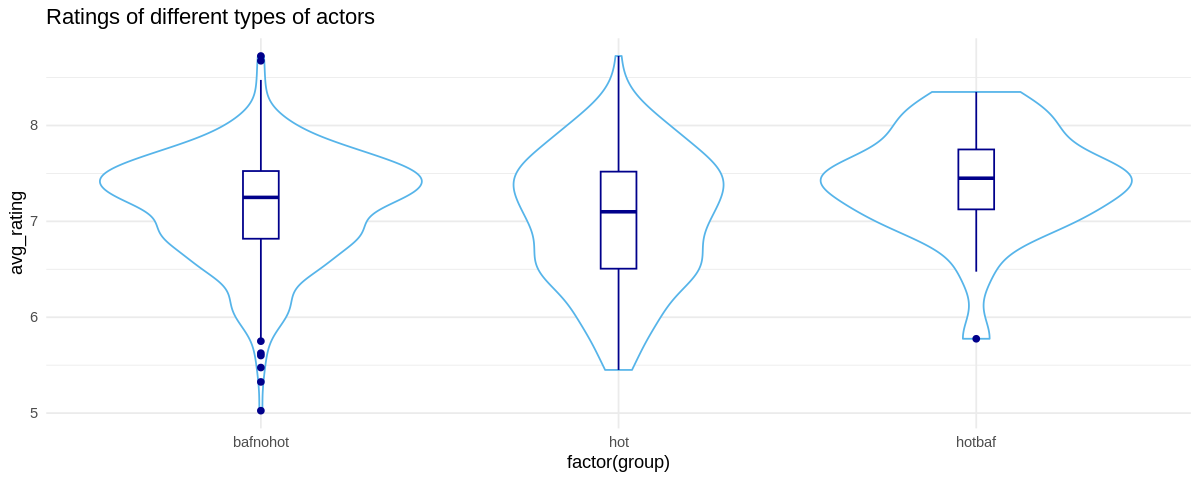

In [ ]:
p <- ggplot(toplot, aes(x = factor(group), y = avg_rating), fig(17,10)) + geom_violin(color='#56B4E9') +
   geom_boxplot(width=0.1, color='dark blue')  + theme_minimal()  + #geom_text(data = summary, aes(x = factor(century), y = 128, label = nn)) +
   labs(title = 'Ratings of different types of actors')
p #TODO put the n num

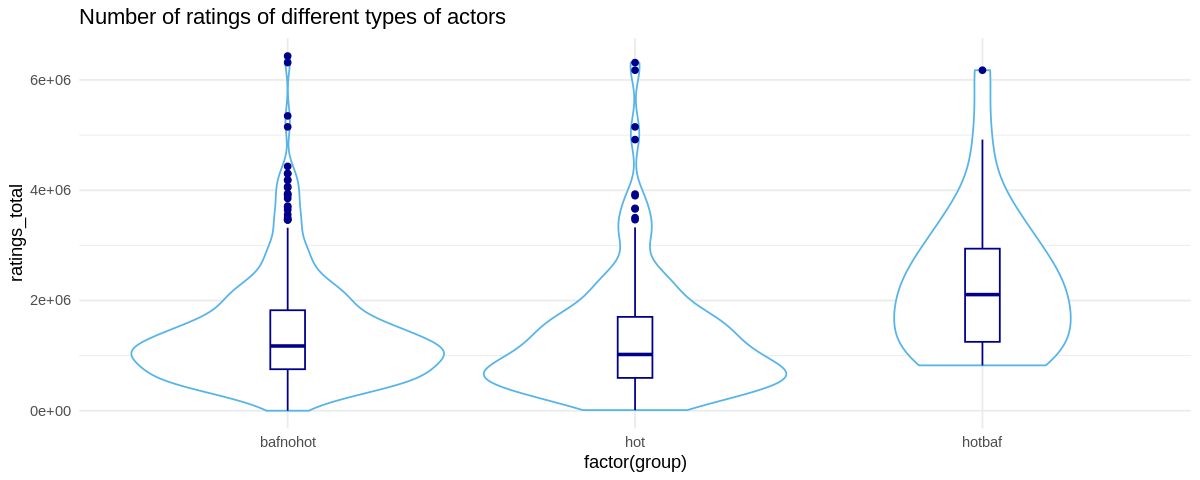

In [ ]:
p <- ggplot(toplot, aes(x = factor(group), y = ratings_total), fig(17,10)) + geom_violin(color='#56B4E9') +
   geom_boxplot(width=0.1, color='dark blue')  + theme_minimal()  + #geom_text(data = summary, aes(x = factor(century), y = 128, label = nn)) +
   labs(title = 'Number of ratings of different types of actors')
p #TODO put the n num
#TODO interesting to point out outliers
#TODO compare with average sample 